# Generate a pore
This section describes how to create a pore.

In [1]:
import os
import pymol
import xmlrpc.client as xmlrpclib

In [2]:
os.system("pymol -R &")
cmd = xmlrpclib.ServerProxy('http://localhost:9123')

In [3]:
from pymol import cmd
from IPython.display import Image
from PIL             import Image
from porems.store    import Store

In [4]:
def img_pymol(mol, pic, is_finish=True):
    # Save gro file
    if is_finish: mol.finish()
    Store(mol,"_build").gro("temp.gro")
    
    # Load into pymol
    cmd.delete("all")
    cmd.load(link)
    
    # Edit view
    cmd.set_color("deepBlue", [0.00, 0.45, 0.70])
    # cmd.color("deepBlue")
    # cmd.set("specular","off")
    # cmd.set("surface_quality",4)
    # cmd.set("sphere_quality",2)
    # cmd.set("ray_shadows","off")
    # cmd.set("ray_trace_mode",5)
    cmd.set("ray_opaque_background",0)

    # Generate image
    pic_link = "/tmp/"+pic+".png"
    cmd.png(pic_link, width=400, height=400, dpi=1000, ray=0)
    
    # Load image
    img = Image.open(pic_link)

    # Display image
    display(img)

## Initialize object
An empty pore will be generated by simply initializeing a new object with the desired properties.

In [5]:
from porems.pore import Pore

pore = Pore(size=[10, 10, 10], diam=5, drill="z", res=5.5)
pore.set_name("pore")

## Add catalyst molecules
Using the following function a specific placement can be done within the pore.

In [6]:
from porems.essentials import Catalysator

pore.special(Catalysator(1), [35, 39], [39, 37], 2)

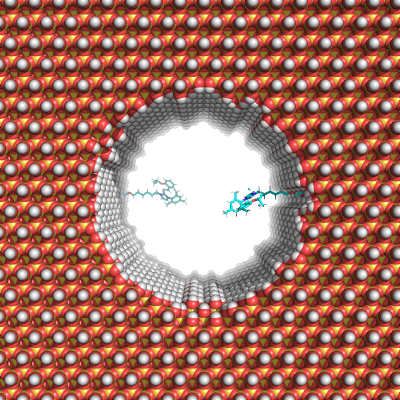

In [8]:
img_pymol(pore, "01")

## Functionalize surface
The entire surface can be filled on the inside and outside using the following command.

In [9]:
pore = Pore(size=[10, 10, 10], diam=5, drill="z", res=5.5)
pore.set_name("pore")
pore.special(Catalysator(1), [35, 39], [39, 37], 2)

In [10]:
from porems.essentails import Epoxi
from porems.essentails import TMS

pore.attach(Epoxi(), [0, 1], [1, 2], 0, 60)
pore.attach(TMS(),   [0, 1], [1, 2], 1, 50)

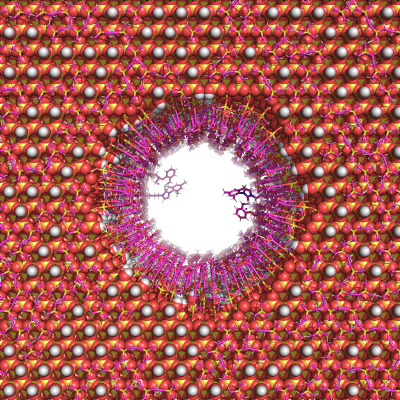

In [11]:
img_pymol(pore, "02")

### Finalize
In order to finalize the pore simply run following command

In [12]:
pore = Pore(size=[10, 10, 10], diam=5, drill="z", res=5.5)
pore.set_name("pore")
pore.special(Catalysator(1), [35, 39], [39, 37], 2)
pore.attach(Epoxi(), [0, 1], [1, 2], 0, 60)
pore.attach(TMS(),   [0, 1], [1, 2], 1, 50)

In [ ]:
pore.finalize()